In [ ]:
!pip install mysql-connector-python

In [1]:
import pandas as pd
titanicDB = pd.read_csv('C:/Users/meuni/Downloads/titanic.csv',index_col=False)
titanicDB.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [2]:
import mysql.connector as msql
from mysql.connector import Error

try:
    conn = msql.connect(host='localhost', user='root', password='Greta21!')
    if conn.is_connected():
        cursor = conn.cursor()

        # Exemple de requête SELECT
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print("You're connected to database: ", record[0])

        # Maintenant, vous pouvez exécuter les autres requêtes
        cursor.execute('DROP DATABASE IF EXISTS titanicDB;')
        cursor.execute("CREATE DATABASE titanicDB")
        print("titanicDB database is created")

except Error as e:
    print("Error while connecting to MySQL", e)

You're connected to database:  None
titanicDB database is created


In [49]:
import mysql.connector as msql
from mysql.connector import Error

try:
    # Connect to the MySQL server
    conn = msql.connect(host='localhost', user='root', password='Greta21!')
    if conn.is_connected():
        print("You're connected to MySQL server")
        cursor = conn.cursor()
        
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        

        # Create new database
        cursor.execute('DROP DATABASE IF EXISTS titanicDB;')
        cursor.execute("CREATE DATABASE titanicDB")
        print("titanicDB database is created")

except Error as e:
    print("Error while connecting to MySQL", e)


You're connected to MySQL server
titanicDB database is created


In [3]:
titanicDB.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object

In [4]:
import mysql.connector as mysql
from mysql.connector import Error
import pandas as pd

try:
    titanicDB = pd.read_csv('C:/Users/meuni/Downloads/titanic.csv')

    # Se connecter à MySQL
    conn = mysql.connect(host='localhost', database='titanicDB', user='root', password='Greta21!')

    if conn.is_connected():
        # Créer un curseur
        cursor = conn.cursor()

        # Créer une table dans la base de données
        cursor.execute("DROP TABLE IF EXISTS testtitanictest;")
        print('Création de la table....')

        # Mapper les types de données Pandas aux types de données MySQL
        mysql_data_types = {
            'int64': 'INT',
            'float64': 'FLOAT',
            'object': 'VARCHAR(255)'
        }
        # Générer la requête CREATE TABLE en fonction des colonnes du DataFrame et de leurs types de données
        create_table_query = ", ".join([f"{col} {mysql_data_types[str(t)]}" for col, t in zip(titanicDB.columns, titanicDB.dtypes)])
        create_table_query = f"CREATE TABLE testtitanictest ({create_table_query})"
        cursor.execute(create_table_query)

        print("La table testtitanictest a été créée....")

        # Insérer les données dans la table 'testtitanictest'
        columns = ', '.join(titanicDB.columns)
        for i, row in titanicDB.iterrows():
            # Remplacer les valeurs NaN par None (null en SQL)
            row = row.where(pd.notna(row), None)

            values = ', '.join('%s' for _ in range(len(row)))
            insert_query = f"INSERT INTO testtitanictest ({columns}) VALUES ({values})"
            cursor.execute(insert_query, tuple(row))
            conn.commit()

        # Exécuter une requête SELECT
        sql_select = "SELECT * FROM testtitanictest"
        cursor.execute(sql_select)

        # Récupérer tous les enregistrements
        result = cursor.fetchall()
        for i in result:
            print(i)

except Error as e:
    print("Erreur lors de la connexion à MySQL", e)

finally:
    # Fermer la connexion
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("La connexion MySQL est fermée.")

Création de la table....
La table testtitanictest a été créée....
(1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171', '$7.25', None, 'S')
(2, 1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', 38.0, 1, 0, 'PC 17599', '$71.2833', 'C85', 'C')
(3, 1, 3, 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0, 'STON/O2. 3101282', '$7.925', None, 'S')
(4, 1, 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35.0, 1, 0, '113803', '$53.1', 'C123', 'S')
(5, 0, 3, 'Allen, Mr. William Henry', 'male', 35.0, 0, 0, '373450', '$8.05', None, 'S')
(6, 0, 3, 'Moran, Mr. James', 'male', None, 0, 0, '330877', '$8.4583', None, 'Q')
(7, 0, 1, 'McCarthy, Mr. Timothy J', 'male', 54.0, 0, 0, '17463', '$51.8625', 'E46', 'S')
(8, 0, 3, 'Palsson, Master. Gosta Leonard', 'male', 2.0, 3, 1, '349909', '$21.075', None, 'S')
(9, 1, 3, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', 27.0, 0, 2, '347742', '$11.1333', None, 'S')
(10, 1, 2, 'Nasser, Mrs. Nicholas (Ad

In [11]:
from IPython.display import Image, display

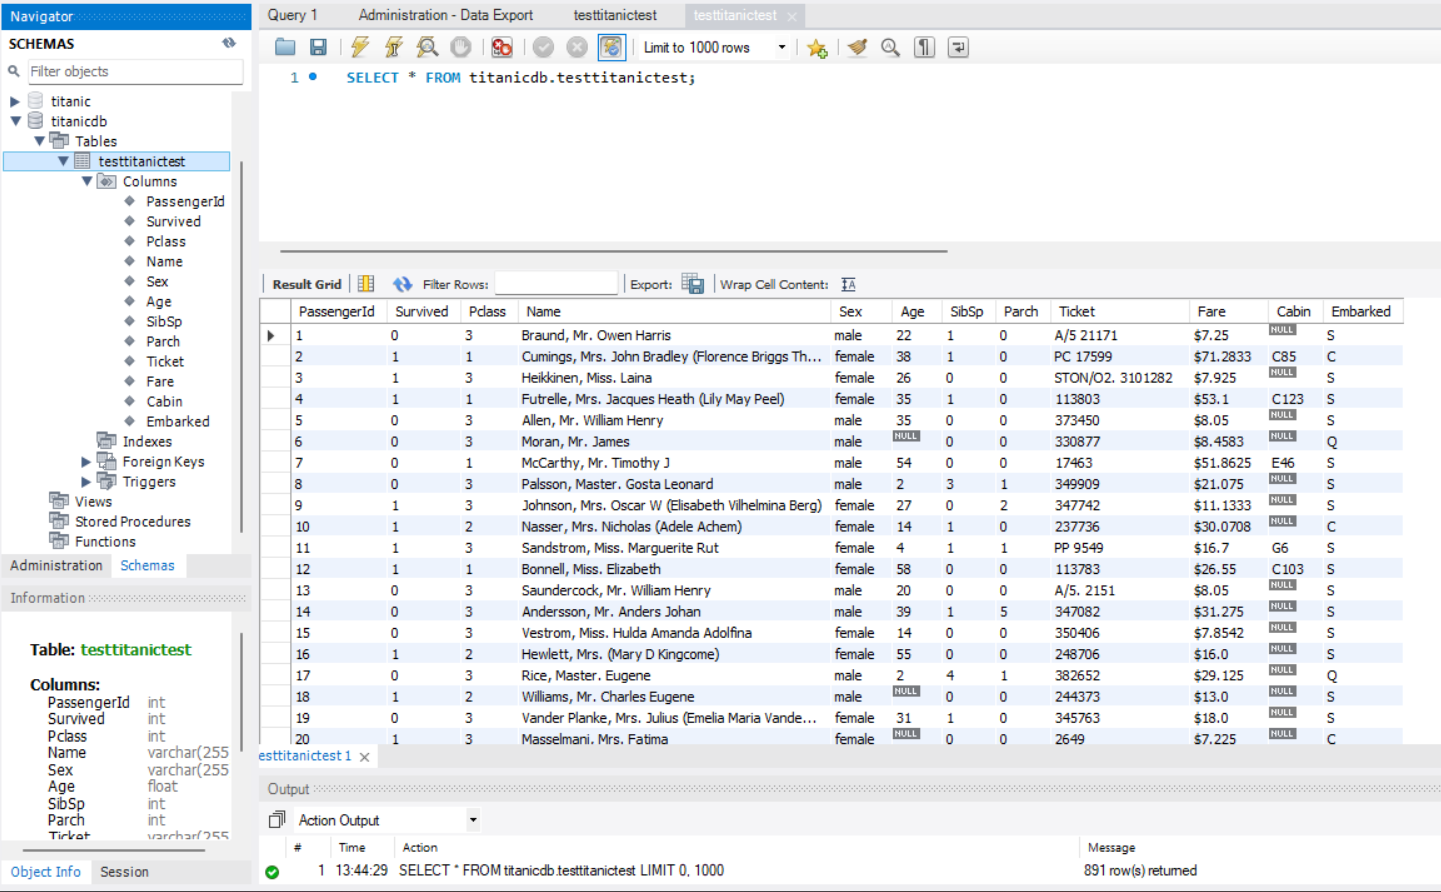

In [13]:
display(Image(filename='imagetitanicDB.png'))